In [44]:
from collections import defaultdict
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt

from nnperm_utils import error_barrier_linspace_sample, error_barrier_from_losses


def load_values(save_dir: Path):
    values = defaultdict(list)
    for f in save_dir.glob("*"):
        outputs = torch.load(f, map_location=torch.device("cpu"))
        _, i, j = f.stem.split("_")
        values[f"rep_{i}"].append(int(i))
        values[f"rep_{j}"].append(int(j))
        for k, v in outputs.items():
            if k.endswith("_barriers"):
                values[k[:-len("_barriers")]].append(np.mean(v, axis=1))
                values[k].append(error_barrier_from_losses(v, reduction='mean'))
            else:
                values[k].append(v)
    return values

def plot_mean_std(title, y, y_max):
    mean = np.mean(y, axis=0)
    std = np.std(y, axis=0)
    midpoint = len(mean) // 2
    x = error_barrier_linspace_sample(len(mean))
    plt.plot(x, mean)
    plt.fill_between(x, mean - std, mean + std, alpha=0.15)
    plt.title(f"{title} {mean[midpoint]:0.3f} {std[midpoint]:0.3f}")
    plt.xlabel("Interpolation alpha")
    plt.ylim([0., y_max])
    plt.ylabel("Error barrier (cross entropy)")

def plot_error_barriers(barriers: dict, y_max: float):
    plt.figure(figsize=(4 * len(barriers), 4))
    for i, (k, v) in enumerate(barriers.items()):
        plt.subplot(1, len(barriers) + 1, i + 1)
        plot_mean_std(k, np.stack(v, axis=0), y_max)
    plt.show()

def plot_from_dir(save_dir, y_max):
    values = load_values(Path(save_dir))
    barriers = {k: v for k, v in values.items() if k.endswith("_barriers")}
    plot_error_barriers(barriers, y_max)

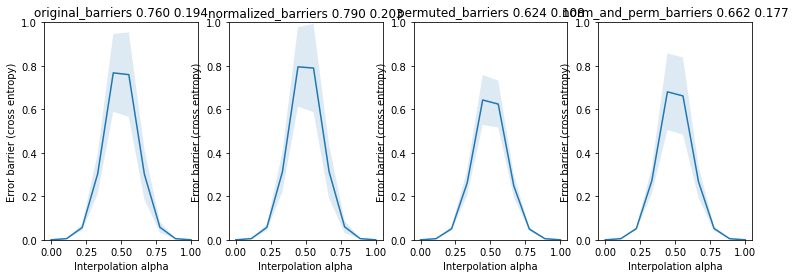

In [45]:
plot_from_dir("outputs/train_574e51abc295d8da78175b320504f2ba_5_10_10000", 1)

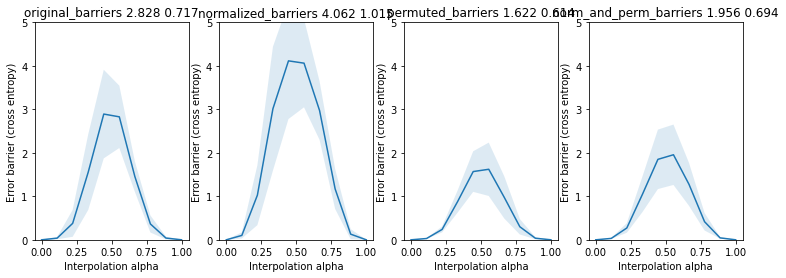

In [46]:
plot_from_dir("outputs/train_9d0811cc67a44e1ec85e702a5e01570f_5_10_10000", 5)